<DIV ALIGN=CENTER>

# Introduction to NLP: Topic Modeling
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

Topic modelling:

NLTK
gensim

build on material from L1.

-----

Useful information at https://github.com/nealcaren/quant-text-fall-2014/blob/master/Topic_Modeling_Options.ipynb, http://radimrehurek.com/gensim/tutorial.html, 

What about viz?

https://github.com/bmabey/pyLDAvis

http://cpsievert.github.io/LDAvis/newsgroup/vis/#topic=0&lambda=1&term=


In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                           subset='train', shuffle=True, random_state=23,
                           remove=('headers', 'footers', 'quotes'))

test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                          subset='test', shuffle=True, random_state=23,
                          remove=('headers', 'footers', 'quotes'))

In [3]:
# Use TD-IDF on newgroup data.
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(stop_words = 'english',
                     lowercase=True,
                     min_df=2,
                     max_features=5000)
                     
train_data = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

In [4]:
# Compute topics by using NMF
from sklearn.decomposition import NMF

num_topics = 10
nmf = NMF(n_components = num_topics, max_iter = 1000).fit(train_data)

In [5]:
from helper_code import tpterms as tp

nmf_topics = tp.get_topics(cv, nmf)

Topic  0: just don like think know ve good time really want
Topic  1: windows file dos files window program use using problem version
Topic  2: god jesus bible believe faith christ christian christians say church
Topic  3: geb dsl n3jxp chastity cadre pitt shameful intellect skepticism surrender
Topic  4: drive scsi drives disk card hard controller ide floppy bus
Topic  5: game team games year players season play hockey win league
Topic  6: thanks does know mail advance info hi anybody looking help
Topic  7: key chip encryption clipper keys use escrow government algorithm nsa
Topic  8: people israel government jews israeli armenian state gun law rights
Topic  9: 00 edu new sale com space price offer 10 email


-----

### Understanding Topic Terms

We can build a dataaframe to visualize the relationship between topic terms and the classes.

-----

In [6]:
# We transform and normalize the data, 
# by using l1 so document topic probabilty sums to unity.

from sklearn.preprocessing import normalize

td = nmf.transform(train_data)
td_norm = normalize(td, norm='l1', axis=1)

In [7]:
# We use a DataFrame to simplify the collecting of the data for display.

df = pd.DataFrame(td_norm, columns=nmf_topics)
df.fillna(value=0, inplace=True)
df['label'] = pd.Series(train['target_names'], dtype="category")

df.groupby('label').mean()

,"just, don, like, think, know","windows, file, dos, files, window","god, jesus, bible, believe, faith","geb, dsl, n3jxp, chastity, cadre","drive, scsi, drives, disk, card","game, team, games, year, players","thanks, does, know, mail, advance","key, chip, encryption, clipper, keys","people, israel, government, jews, israeli","00, edu, new, sale, com"
label,,,,,,,,,,
alt.atheism,0.333161,0.019355,0.347318,0.000000,0.000000,0.057290,0.020112,0.000000,0.221172,0.001592
comp.graphics,0.000000,0.000000,0.077179,0.409242,0.000000,0.000000,0.000000,0.000000,0.000000,0.513579
comp.os.ms-windows.misc,0.549912,0.000000,0.000000,0.000000,0.000000,0.137005,0.280049,0.000000,0.033034,0.000000
comp.sys.ibm.pc.hardware,0.404612,0.000000,0.505521,0.007825,0.000000,0.006599,0.000000,0.000000,0.075443,0.000000
comp.sys.mac.hardware,0.029728,0.435596,0.002608,0.000000,0.000000,0.000000,0.376368,0.000000,0.000000,0.155699
comp.windows.x,0.456828,0.000000,0.000000,0.000000,0.000000,0.000000,0.335660,0.000000,0.097980,0.109532
misc.forsale,0.196996,0.212686,0.000000,0.000000,0.142775,0.066887,0.342125,0.007279,0.031251,0.000000
rec.autos,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rec.motorcycles,0.149162,0.000000,0.009338,0.035554,0.014113,0.051547,0.000000,0.112357,0.583763,0.044165


-----
### Topic-based Classification

We can use topics consructed from the data to classify.

-----

In [8]:
# Build classifier from topics.
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(td, train['target'])

# Apply classifier to blind test data
ts_preds = clf.predict(nmf.transform(test_data))

from sklearn import metrics

print(metrics.classification_report(test['target'], ts_preds,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.27      0.06      0.10       389
 comp.os.ms-windows.misc       0.41      0.46      0.43       394
comp.sys.ibm.pc.hardware       0.37      0.46      0.41       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385
          comp.windows.x       0.33      0.52      0.40       395
            misc.forsale       0.58      0.55      0.56       390
               rec.autos       0.36      0.07      0.12       396
         rec.motorcycles       0.15      0.70      0.25       398
      rec.sport.baseball       0.47      0.22      0.30       397
        rec.sport.hockey       0.37      0.78      0.50       399
               sci.crypt       0.58      0.60      0.59       396
         sci.electronics       0.20      0.16      0.18       393
                 sci.med       0.24      0.06      0.09       396
         

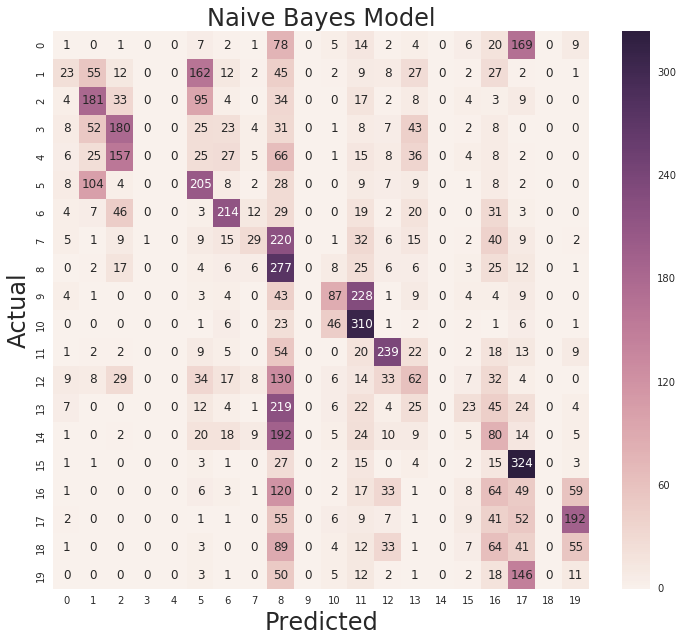

In [9]:
# Create Confusion Plot
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], ts_preds, range(20), 20, 'Naive Bayes Model')

-----
### Student Activity

- Why are classification results so bad?
- Increase topic model terms.
- Change classifier.
- Use normalized values.

-----

## LDA

Introduce LDA. Start with scikit learn. 

-----

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5,
                                learning_method='online', learning_offset=5.,
                                random_state=23).fit(train_data)

In [11]:
lda_topics = tp.get_topics(cv, lda)

Topic  0: window server widget font postscript motif x11r5 xterm fonts xlib
Topic  1: key clipper encryption chip keys algorithm nsa escrow crypto secure
Topic  2: devils alomar detroit traded phillies islanders toronto pittsburgh chicago montreal
Topic  3: msg centris vram simm dram test food hudson venus chinese
Topic  4: subscribe quit navy mailing min mil uu gps newsletter ac
Topic  5: ax satan angels soderstrom hulk max q6 g9v giz bxn
Topic  6: printers radar detector greece detectors uv cyprus greek bj laser
Topic  7: just don like people think know good time does ve
Topic  8: windows thanks drive card file dos use pc files scsi
Topic  9: accelerator muscle ml mm kg dh pl p2 printf dm


-----

### Visualizing Topics

-----

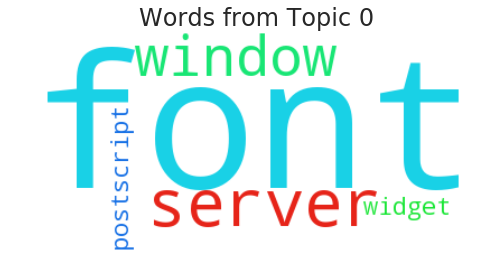

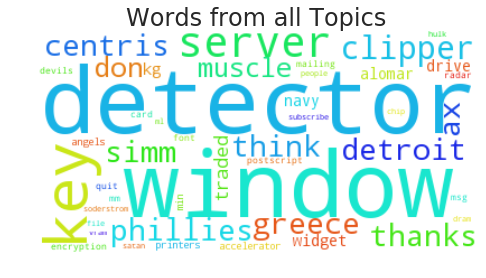

In [12]:
from helper_code import wcviz as wc

wc.make_wc(lda_topics[0].replace(',', ''), 'Words from Topic 0')

text = ', '.join(lda_topics)
wc.make_wc(text.replace(',', ''), 'Words from all Topics')

-----

### Student Activity

In the preceding cells, we . Now
that you have run the Notebook, try making the following changes.

1. ... . Can you ?

2. Change 

3. Using 

4. Try 

-----

## Gensim

Start with simple intro to gensim

-----

In [1]:
# Next section follows gensim tutorial

# As a text example, we use the course description for INFO490  SP16.
info_course = ['Advanced Data Science: This class is an asynchronous, online course.', 
               'This course will introduce advanced data science concepts by building on the foundational concepts presented in INFO 490: Foundations of Data Science.', 
               'Students will first learn how to perform more statistical data exploration and constructing and evaluating statistical models.', 
               'Next, students will learn machine learning techniques including supervised and unsupervised learning, dimensional reduction, and cluster finding.', 
               'An emphasis will be placed on the practical application of these techniques to high-dimensional numerical data, time series data, image data, and text data.', 
               'Finally, students will learn to use relational databases and cloud computing software components such as Hadoop, Spark, and NoSQL data stores.', 
               'Students must have access to a fairly modern computer, ideally that supports hardware virtualization, on which they can install software.', 
               'This class is open to sophomores, juniors, seniors and graduate students in any discipline who have either taken a previous INFO 490 data science course or have received instructor permission.']

# Simple stop words
stop_words = set('for a of the and to in on an'.split())

# Parse text into words, make lowercase and remove stop words
txts = [[word for word in sentance.lower().split() if word not in stop_words]
        for sentance in info_course]

# Keep only those words appearing more than once
# Easy with a Counter, but need a flat list
from collections import Counter
frequency = Counter([word for txt in txts for word in txt])

# Now grab tokens that appear more than once
tokens = [[token for token in txt if frequency[token] > 1]
          for txt in txts]

# Display the tokens
import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=80, compact=True)

pp.pprint(tokens)

[ ['advanced', 'data', 'this', 'class', 'is'],
  [ 'this', 'course', 'will', 'advanced', 'data', 'science', 'concepts',
    'concepts', 'info', 'data'],
  ['students', 'will', 'learn', 'statistical', 'data', 'statistical'],
  ['students', 'will', 'learn', 'techniques'],
  ['will', 'techniques', 'data,', 'data,', 'data,'],
  ['students', 'will', 'learn', 'data'], ['students', 'have'],
  [ 'this', 'class', 'is', 'students', 'have', 'info', 'data', 'science',
    'course', 'have']]


In [2]:
from gensim import corpora
dict_gensim = corpora.Dictionary(tokens)
print(dict_gensim)

Dictionary(16 unique tokens: ['statistical', 'concepts', 'have', 'techniques', 'science']...)


In [3]:
print(dict_gensim.token2id)

{'statistical': 12, 'concepts': 8, 'have': 15, 'techniques': 13, 'science': 6, 'course': 9, 'this': 1, 'is': 4, 'will': 5, 'students': 11, 'data': 3, 'data,': 14, 'class': 0, 'learn': 10, 'info': 7, 'advanced': 2}


In [4]:
new_txt = 'data science is cool, you should take this course to learn data concepts'
new_vec = dict_gensim.doc2bow(new_txt.lower().split())
pp.pprint(new_vec)

[(1, 1), (3, 2), (4, 1), (6, 1), (8, 1), (9, 1), (10, 1)]


In [5]:
crps = [dict_gensim.doc2bow(txt) for txt in txts]
print(crps)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (2, 1), (3, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1)], [(3, 1), (5, 1), (10, 1), (11, 1), (12, 2)], [(5, 1), (10, 1), (11, 1), (13, 1)], [(5, 1), (13, 1), (14, 3)], [(3, 1), (5, 1), (10, 1), (11, 1)], [(11, 1), (15, 1)], [(0, 1), (1, 1), (3, 1), (4, 1), (6, 1), (7, 1), (9, 1), (11, 1), (15, 2)]]


In [6]:
from gensim import models

tfidf = models.TfidfModel(crps)

In [7]:
print(new_txt)
print(new_vec)

pp.pprint(tfidf[new_vec])

data science is cool, you should take this course to learn data concepts
[(1, 1), (3, 2), (4, 1), (6, 1), (8, 1), (9, 1), (10, 1)]
[ (1, 0.2731153103729994), (3, 0.2617482842884797), (4, 0.3860184772660643),
  (6, 0.3860184772660643), (8, 0.5790277158990964), (9, 0.3860184772660643),
  (10, 0.2731153103729994)]


In [20]:
crps_tfidf = tfidf[crps]
lda_gs = models.LdaModel(corpus=crps_tfidf, id2word=dict_gensim, num_topics=3, passes=5)

In [21]:
lda_gs.print_topics(3)

['0.124*learn + 0.094*techniques + 0.092*data, + 0.083*will + 0.081*concepts + 0.071*students + 0.065*data + 0.047*on + 0.042*info + 0.042*science',
 '0.100*class + 0.100*is + 0.084*have + 0.082*this + 0.074*advanced + 0.074*an + 0.059*course + 0.059*info + 0.059*science + 0.055*data',
 '0.139*statistical + 0.126*have + 0.098*on + 0.077*students + 0.053*learn + 0.046*data + 0.045*will + 0.038*science + 0.038*info + 0.038*course']

In [22]:
import operator

for idx, txt in enumerate(lda_gs[crps_tfidf]):
    srt_txt = sorted(txt, key=operator.itemgetter(1))
    print('Sentance {0:1d} has primary topic {1:1d} with probability = {2:4.3f}'\
          .format(idx, srt_txt[-1][0], srt_txt[-1][1]))

Sentance 0 has primary topic 1 with probability = 0.794
Sentance 1 has primary topic 0 with probability = 0.747
Sentance 2 has primary topic 2 with probability = 0.645
Sentance 3 has primary topic 0 with probability = 0.757
Sentance 4 has primary topic 0 with probability = 0.722
Sentance 5 has primary topic 0 with probability = 0.758
Sentance 6 has primary topic 2 with probability = 0.729
Sentance 7 has primary topic 1 with probability = 0.798


In [23]:
ttps = lda_gs.top_topics(corpus=crps_tfidf, num_words=5)
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    class               : 0.0998
    is                  : 0.0997
    have                : 0.0843
    this                : 0.0817
    advanced            : 0.0740
-----------------------------------
Topic 1
-----------------------------------
    learn               : 0.1242
    techniques          : 0.0943
    data,               : 0.0922
    will                : 0.0834
    concepts            : 0.0811
-----------------------------------
Topic 2
-----------------------------------
    statistical         : 0.1393
    have                : 0.1264
    on                  : 0.0985
    students            : 0.0773
    learn               : 0.0534
-----------------------------------


-----

### Topic Modelling with gensim

Apply gensim to the problem we have been analyzing.

-----

In [24]:
from gensim import matutils as mat
from gensim import models as md
from gensim.corpora.dictionary import Dictionary

# transform sparse matrix into gensim corpus
td_gensim = mat.Sparse2Corpus(train_data, documents_columns=False)

# Build temporary dictionary from scikit learn vectorizer
# for use with gensim
tmp_dct = dict((id, word) for word, id in cv.vocabulary_.items())
dct = Dictionary.from_corpus(td_gensim, id2word=tmp_dct)

In [25]:
# LSI

lsi = md.lsimodel.LsiModel(corpus=td_gensim, id2word=dct, num_topics=5)
lsi.print_topics()

['0.167*"don" + 0.164*"just" + 0.162*"like" + 0.161*"know" + 0.153*"people" + 0.138*"think" + 0.128*"does" + 0.115*"good" + 0.114*"use" + 0.110*"time"',
 '-0.256*"god" + 0.243*"windows" + 0.228*"thanks" + -0.192*"people" + 0.158*"card" + 0.148*"drive" + 0.123*"dos" + -0.115*"jesus" + 0.114*"mail" + 0.113*"file"',
 '0.487*"god" + 0.180*"jesus" + 0.159*"windows" + 0.147*"does" + 0.129*"thanks" + -0.125*"year" + -0.121*"edu" + -0.121*"pitt" + -0.121*"geb" + -0.119*"dsl"',
 '-0.261*"edu" + -0.236*"geb" + -0.234*"cadre" + -0.234*"dsl" + -0.234*"n3jxp" + -0.234*"chastity" + -0.233*"shameful" + -0.232*"pitt" + -0.232*"skepticism" + -0.232*"intellect"',
 '0.303*"key" + -0.260*"drive" + -0.213*"god" + 0.174*"chip" + 0.172*"government" + 0.171*"encryption" + 0.149*"clipper" + -0.144*"game" + 0.138*"use" + 0.130*"keys"']

In [26]:
# LDA

lda_gs = md.LdaModel(corpus=td_gensim, id2word=dct, num_topics=5, passes=2)
lda_gs.show_topics()

['0.006*__ + 0.005*alomar + 0.005*gm + 0.005*lunar + 0.004*moon + 0.004*militia + 0.004*bmw + 0.004*maine + 0.004*captain + 0.004*gl',
 '0.005*people + 0.004*don + 0.004*just + 0.004*think + 0.004*god + 0.003*like + 0.003*know + 0.003*say + 0.003*time + 0.003*good',
 '0.008*game + 0.008*team + 0.006*games + 0.006*year + 0.005*players + 0.005*season + 0.004*play + 0.004*hockey + 0.004*player + 0.004*league',
 '0.008*windows + 0.007*file + 0.006*program + 0.005*window + 0.005*thanks + 0.005*use + 0.005*files + 0.004*know + 0.004*using + 0.004*dos',
 '0.006*drive + 0.005*card + 0.005*thanks + 0.004*new + 0.004*know + 0.004*does + 0.004*like + 0.004*scsi + 0.003*price + 0.003*edu']

In [27]:
ttps = lda_gs.top_topics(corpus=td_gensim, num_words=5)

In [28]:
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    people              : 0.0049
    don                 : 0.0042
    just                : 0.0041
    think               : 0.0036
    god                 : 0.0035
-----------------------------------
Topic 1
-----------------------------------
    game                : 0.0085
    team                : 0.0079
    games               : 0.0062
    year                : 0.0055
    players             : 0.0050
-----------------------------------
Topic 2
-----------------------------------
    drive               : 0.0061
    card                : 0.0047
    thanks              : 0.0047
    new                 : 0.0040
    know                : 0.0037
-----------------------------------
Topic 3
-----------------------------------
    windows             : 0.0084
    file                : 0.0073
    program             : 0.0056
    window              : 0.0051
    thanks              : 0.0051
-----------------------------------
Topic 4
------------

-----

### Student Activity

In the preceding cells, we . Now
that you have run the Notebook, try making the following changes.

1. ... . Can you ?

2. Change 

3. Using 

4. Try 

-----